In [1]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: floa

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='bmi', ylabel='Count'>

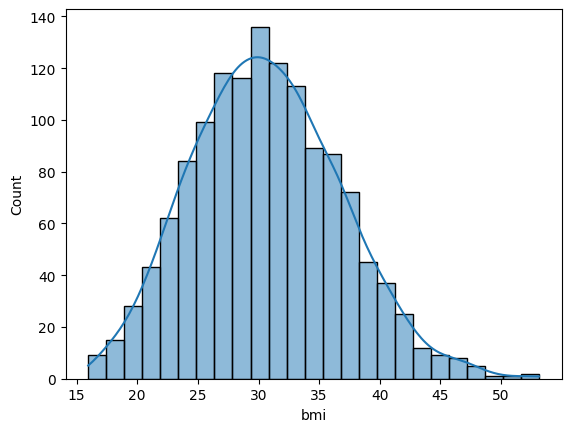

In [5]:
print(df.describe())
print(df.info())

import seaborn as sns
sns.histplot(df, x='bmi', kde=True)

In [26]:
df_dummy = pd.get_dummies(
    df, columns=df.select_dtypes(["object"]).columns, drop_first=True
).astype(int)
df_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [12]:
from sklearn import preprocessing
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_dummy), columns=df_dummy.columns)
df_zscore.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.518122,-0.908614,0.298548,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.462657,-0.078767,-0.953694,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.462657,1.580926,-0.728672,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.335438,-0.908614,0.719845,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.354659,-0.908614,-0.776832,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [13]:
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_dummy), columns=df_dummy.columns)
df_minmax.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.315789,0.0,0.251608,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.473684,0.2,0.009641,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.473684,0.6,0.053121,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.184211,0.0,0.333014,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.342105,0.0,0.043816,1.0,0.0,1.0,0.0,0.0


In [27]:
y = df_zscore["charges"]
X = df_zscore.drop(columns="charges").assign(const=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.7
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:56:48   Log-Likelihood:                -968.74
No. Observations:                1338   AIC:                             1955.
Df Residuals:                    1329   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.2981      0.014  

In [19]:
y = df_minmax['charges']
X = df_minmax.drop(columns=['charges']).assign(const=1)

model_minmax = sm.OLS(y, X).fit()
print(model_minmax.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.7
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:44:26   Log-Likelihood:                 1230.8
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.1887      0.009  

When Choosing coefficients to remove, choose the one with the lowest coefficient value/largest p value.                                 
In this case, sex. 

In [20]:
y = df_minmax["charges"]
X = df_minmax.drop(columns=["charges", "sex_male"]).assign(const=1)

model_minmax = sm.OLS(y, X).fit()
print(model_minmax.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.6
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:44:30   Log-Likelihood:                 1230.7
No. Observations:                1338   AIC:                            -2445.
Df Residuals:                    1330   BIC:                            -2404.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.1888      0.009  

In [33]:
df2 = df_dummy.copy()
import numpy as np

y = df_dummy["charges"]
X = df_dummy.drop(columns=["charges"]).assign(const=1)
model = sm.OLS(y, X).fit()

df2["predicted"] = model.fittedvalues
df2["residual"] = abs(df2["charges"] - df2["predicted"])
df2['residual squared'] = df2['residual']**2
print("Mean absolute error:", df2["residual"].mean())
print("Root mean squared error:", np.sqrt((df2['residual squared'].mean())))
df2.head()

Mean absolute error: 4170.359803898068
Root mean squared error: 6042.046809733077


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,predicted,residual,residual squared
0,19,27,0,16884,0,1,0,0,1,25156.523661,8272.523661,6.843465e+07
1,18,33,1,1725,1,0,0,1,0,3340.655590,1615.655590,2.610343e+06
2,28,33,3,4449,1,0,0,1,0,6866.897754,2417.897754,5.846230e+06
3,33,22,0,21984,1,0,1,0,0,3695.166565,18288.833435,3.344814e+08
4,32,28,0,3866,1,0,1,0,0,5466.132057,1600.132057,2.560423e+06


-0.09024695327615723


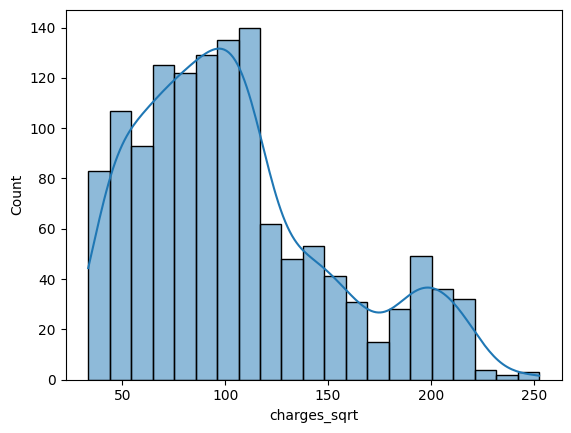

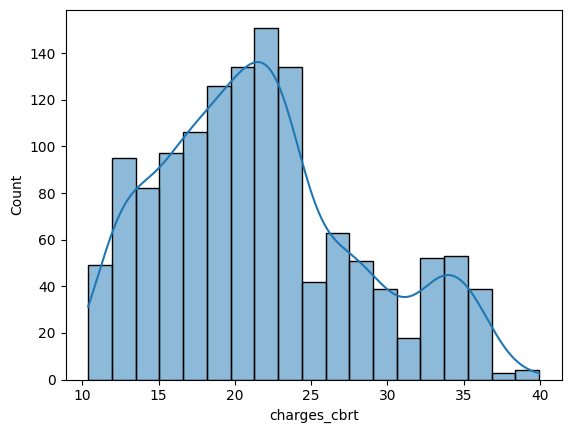

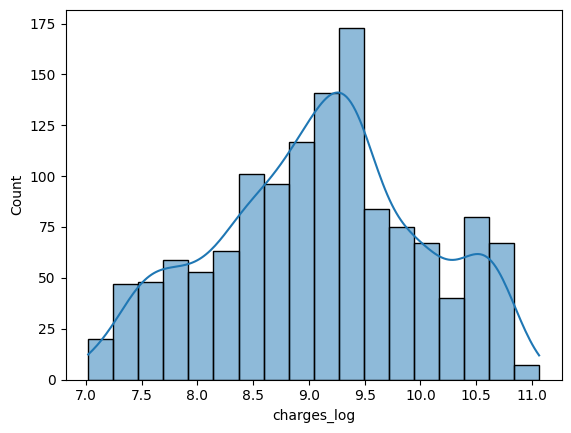

In [41]:
import matplotlib.pyplot as plt
df2['charges_sqrt'] = np.sqrt(df2['charges'])
df2['charges_cbrt'] = np.cbrt(df2['charges'])
df2['charges_log'] = np.log(df2['charges'])

print(df2['charges_log'].skew())

sns.histplot(df2, x='charges_sqrt', kde=True)
plt.show()
sns.histplot(df2, x='charges_cbrt', kde=True)
plt.show()
sns.histplot(df2, x='charges_log', kde=True)
plt.show()

In [42]:
df_dummy['charges_log'] = np.log(df_dummy['charges'])
y = df_dummy['charges_log']
X = df_dummy.drop(columns=['charges', 'charges_log']).assign(const=1)

model_log = sm.OLS(y, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     550.0
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:12:24   Log-Likelihood:                -808.41
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0346      0.001  

In [46]:
np.exp(model_log.predict([44, 18, 3,1,0,0,0,1,1]))

array([7331.98585273])